<a href="https://colab.research.google.com/github/SuperCrabLover/Tensor-Networks-For-Compression-And-Image-Recovery/blob/Experiment1/Tensor_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#https://imagecompression.info/test_images/

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import albumentations as A

(512, 512)


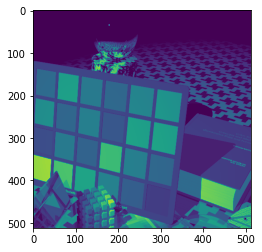

(512, 512)


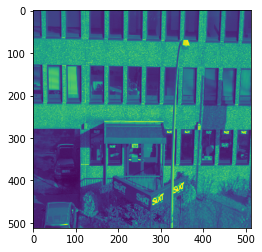

(512, 512)


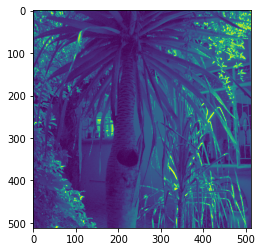

(512, 512)


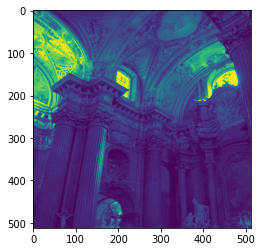

(512, 512)


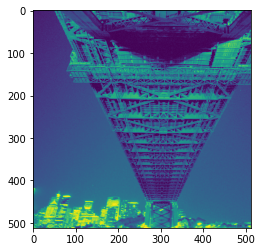

(512, 512)


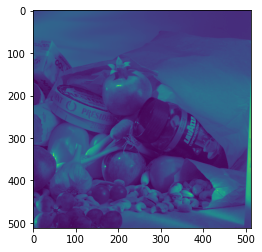

(512, 512)


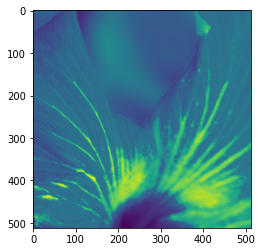

(512, 512)


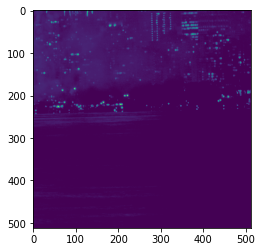

(512, 512)


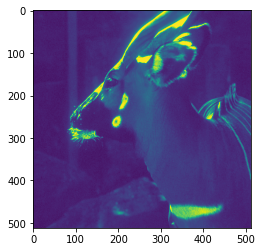

(512, 512)


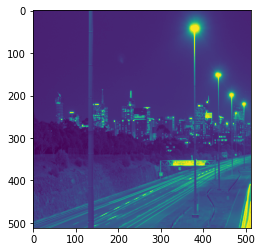

(512, 512)


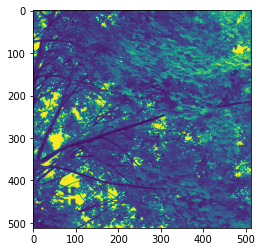

(512, 512)


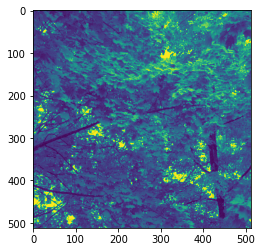

(512, 512)


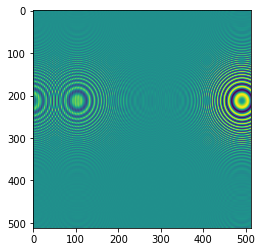

(512, 512)


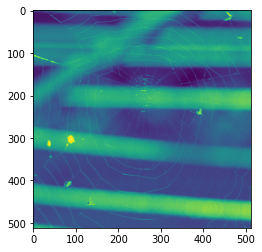

(512, 512)


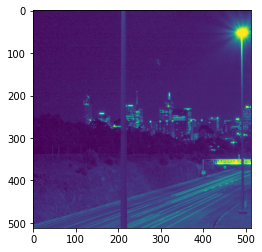

In [5]:
pgmf_path = "/content/drive/MyDrive/gray8bit/"
file_list = ['artificial.pgm', 
             'big_building.pgm', 
             'big_tree.pgm', 
             'cathedral.pgm', 
             'bridge.pgm', 
             'hdr.pgm', 
             'flower_foveon.pgm', 
             'fireworks.pgm', 'deer.pgm', 
             'nightshot_iso_100.pgm', 
             'leaves_iso_200.pgm', 
             'leaves_iso_1600.pgm',
             'zone_plate.pgm', 
             'spider_web.pgm', 
             'nightshot_iso_1600.pgm']

crop = A.RandomResizedCrop(width=512, height=512)

for file_name in file_list:
  im = 0
  with open(pgmf_path + file_name, 'rb') as pgmf:
      im = plt.imread(pgmf)
  im = crop(image=im)["image"]
  print(im.shape)
  plt.imshow(im)
  plt.show()